In [1]:
import numpy as np
import matplotlib.pyplot as plt

import polyseq as pseq

%matplotlib inline

In [2]:
data = pseq.io.load_example()

print(data.shape)
data.head()

(5248, 2717)


,Spn42De,CG15767,CG42586,Mal-A1,NijA,CG33796,E(spl)mbeta-HLH,CG9879,tRNA:Ala-AGC-2-5,bol,...,Cyp301a1,CG17691,CG8909,Lkb1,Tsp42Eh,APC10,CG8866,Cdk5,CR44264,edin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
from scipy.io import mmread

In [4]:
mtx = mmread("/Users/jason/code/github/polyseq/polyseq/examples/matrix.mtx")

In [5]:
dropped = data.drop_genes(num_cells=3).drop_cells(num_genes=10)
print(dropped.shape)

(1958, 906)


,min,max,mean,median
umis,0,338,0,0
umis above 0,1,338,2,1
umis per cell cell,10,10571,163,47
genes expressed,10,903,94,43
umis per gene,151,3383,353,288
cells expressing,21,419,57,48


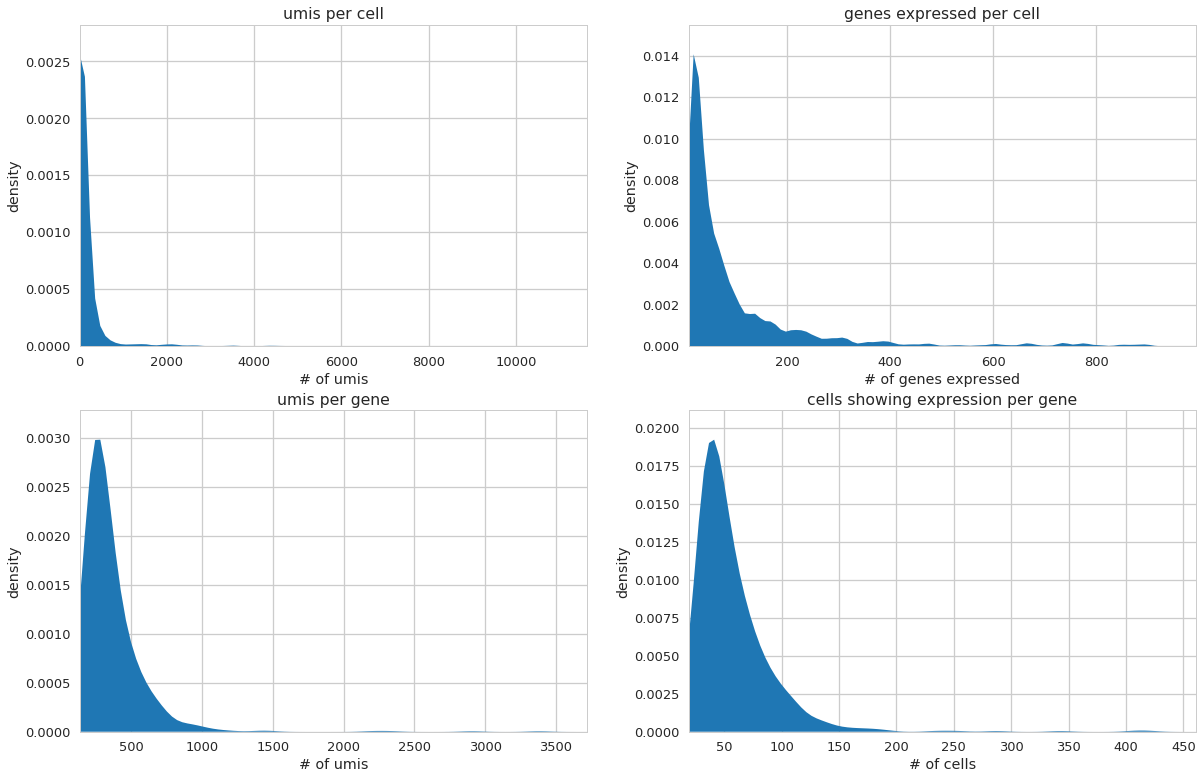

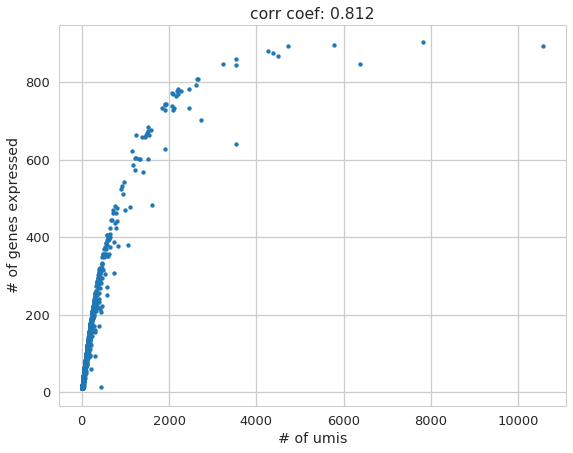

In [7]:
stats = pseq.summary.summarize(dropped)
stats

In [14]:
umis = dropped.sum(axis=1)
normed = dropped.log_normalize()
regressed = pseq.regress(normed, umis[:, np.newaxis], n_processes=12)
regressed.head()

,AOX1,CG14499,CG5938,CG32568,P58IPK,Drep4,LManII,CG7339,pre-mod(mdg4)-C,sut1,...,CR45818,CR45744,CG3224,CR42790,CG12129,CG8323,Tsf3,rdo,CR43912,CG4168
2,-0.431986,-0.179371,-0.170511,-0.145643,-0.250995,-0.180980,-0.317965,-0.248652,-0.326575,-0.203357,...,-0.313467,-0.289895,-0.321133,-0.157021,-0.163033,-0.156459,-0.156723,3.687123,-0.127269,-0.240026
4,-0.374080,-0.133028,-0.115091,-0.098367,-0.207231,-0.137978,-0.272097,2.519719,-0.282557,-0.160092,...,-0.268609,-0.241450,-0.274524,-0.115171,-0.112622,-0.110748,-0.101760,-0.094166,-0.077863,-0.190988
6,-0.370344,-0.130038,-0.111516,-0.095317,-0.204407,-0.135204,-0.269138,-0.203632,-0.279717,-0.157300,...,-0.265715,-0.238325,-0.271517,-0.112471,-0.109369,-0.107799,-0.098214,-0.090883,-0.074675,-0.187824
7,-0.426383,-0.174886,-0.165148,-0.141068,-0.246760,-0.176818,-0.313527,-0.244559,-0.322316,-0.199170,...,-0.309126,-0.285206,-0.316623,-0.152971,-0.158154,-0.152036,-0.151404,-0.140125,-0.122487,-0.235280
11,0.862063,-1.658071,-6.375760,2.184316,-5.151197,-4.995768,-0.032256,3.657560,-0.525758,4.387696,...,-2.806099,3.975367,2.111468,5.234598,3.517125,1.199948,-6.310792,1.821983,0.407836,-0.804349


In [15]:
reduced = pseq.dim.pca(regressed, k=15)
reduced.head()

,pc-0,pc-1,pc-2,pc-3,pc-4,pc-5,pc-6,pc-7,pc-8,pc-9,pc-10,pc-11,pc-12,pc-13,pc-14
0,1.341269,0.977302,-1.183963,-0.685330,-0.596104,1.233802,0.535305,0.081247,-0.337612,0.332040,0.319893,0.420506,0.708053,-0.446231,1.322407
1,3.320507,-0.233000,-0.046786,-0.785261,-0.066233,0.268962,0.420438,0.197707,0.428412,-0.482147,0.179034,-0.667445,0.603094,0.083115,0.198323
2,3.924913,-0.628712,1.662841,-0.720298,0.235597,0.771555,-1.490923,0.176731,0.317036,-0.033560,0.859656,0.859508,0.961489,-0.594589,-0.070616
3,2.013794,-0.914854,-0.863147,2.617823,0.144772,-0.125861,-0.267980,0.233612,-0.295217,-1.201195,-0.313804,1.839006,-1.143244,-0.158874,0.105527
4,-21.918364,-22.519690,-12.202955,3.097881,-17.792553,0.033745,2.655616,5.413305,2.348273,16.518275,-4.626311,13.713468,-7.066451,11.028445,5.835366


In [16]:
clusters = pseq.graph_cluster(reduced, n_neighbors=15)
print("number of clusters: {}".format(np.unique(clusters).shape[0]))

Finding 15 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.10955500602722168 seconds
Jaccard graph constructed in 0.10975122451782227 seconds
Wrote graph to binary file in 0.049382925033569336 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.672102
After 6 runs, maximum modularity is Q = 0.676309
Louvain completed 26 runs in 0.916240930557251 seconds
PhenoGraph complete in 1.215343713760376 seconds
number of clusters: 9


In [23]:
from sklearn.manifold import TSNE
embedding = TSNE(verbose=True, perplexity=60.0).fit_transform(reduced.__array__())

[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 1958 samples in 0.002s...
[t-SNE] Computed neighbors for 1958 samples in 0.146s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1958
[t-SNE] Computed conditional probabilities for sample 1958 / 1958
[t-SNE] Mean sigma: 0.993161
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.009079
[t-SNE] Error after 1000 iterations: 1.619083


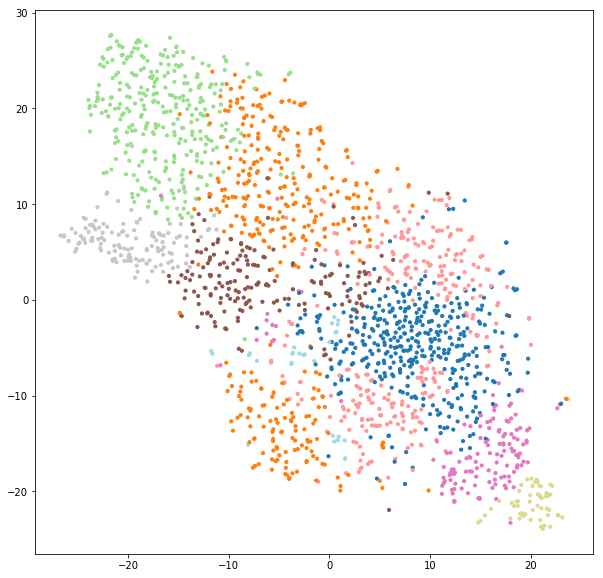

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.scatter(embedding[:, 0], embedding[:, 1], c=clusters, cmap='tab20', s=10)

In [4]:
# regressed.to_pickle(path + "regressed.pkl")
# np.save(path + "clusters.npy", clusters)
# np.save(path + "embedding.npy", embedding)

regressed = pd.read_pickle(path + "regressed.pkl")
clusters = np.load(path + "clusters.npy")
embedding = np.load(path + "embedding.npy")

In [9]:
top_genes = pseq.upregulated(regressed, clusters, n=10)

finding genes for cluster 1
[LibLinear]finding genes for cluster 2
[LibLinear]finding genes for cluster 3
[LibLinear]finding genes for cluster 4
[LibLinear]

/home/jason/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:898: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


finding genes for cluster 5
[LibLinear]finding genes for cluster 6
[LibLinear]finding genes for cluster 7
[LibLinear]finding genes for cluster 8
[LibLinear]finding genes for cluster 9
[LibLinear]finding genes for cluster 10
[LibLinear]finding genes for cluster 11
[LibLinear]finding genes for cluster 12
[LibLinear]finding genes for cluster 13
[LibLinear]finding genes for cluster 14
[LibLinear]finding genes for cluster 15
[LibLinear]finding genes for cluster 16
[LibLinear]finding genes for cluster 17
[LibLinear]finding genes for cluster 18
[LibLinear]finding genes for cluster 19
[LibLinear]finding genes for cluster 20
[LibLinear]finding genes for cluster 21
[LibLinear]

In [10]:
for t in top_genes:
    print(t)

['jim', 'noe', 'pros', 'hdc', 'cib', 'fz2', '14-3-3epsilon', 'MRE16', 'His4r', 'l(3)neo38']
['Hsp27', 'Imp', 'CG14442', 'Hsp23', 'Cyp1', 'fz2', 'CG14321', 'tsr', 'CG42749', 'shep']
['SK', 'Cals', 'ChAT', 'CG2082', 'kcc', 'spab', 'CG5151', 'CCAP-R', 'Fife', 'CG15186']
['nrv3', 'futsch', '14-3-3zeta', 'Rdl', 'Ald', 'Cam', 'CG6154', 'jeb', 'CG31712', 'CG3530']
['CR43283', 'insb', 'CG3800', 'CR45388', 'Galphai', 'cas', 'tap', 'HmgD', 'Bacc', 'E(spl)m7-HLH']
['mt:lrRNA', 'Obp44a', 'fabp', 'Obp99a', 'Npc2a', 'CG6218', 'RpL41', 'org-1', 'CG15353', 'mnd']
['CG31869', 'CG4301', 'E23', 'wrapper', 'Slc45-1', 'CG9451', 'CG42235', 'MRE16', 'Ddc', 'CG12290']
['twit', 'Proc', 'CG14274', 'Tsp42Ef', 'AnxB9', 'CG33543', 'sda', 'CG1648', 'nolo', 'CG15630']
['ImpE1', 'CG14598', 'CG9336', 'NetA', 'GstD1', 'Ama', 'aos', 'toc', 'ken', 'vir-1']
['Cyp6g2', 'CR44933', 'CG14325', 'babo', 'luna', 'hh', 'CR44431', 'Mf', 'CG11029', 'Ucp4A']
['RpL37b', 'CG13674', 'CR44510', 'HisCl1', 'DopEcR', 'MRE16', 'Strip', 'CG8

In [11]:
np.save(path + "top_genes2.npy", np.array(top_genes))

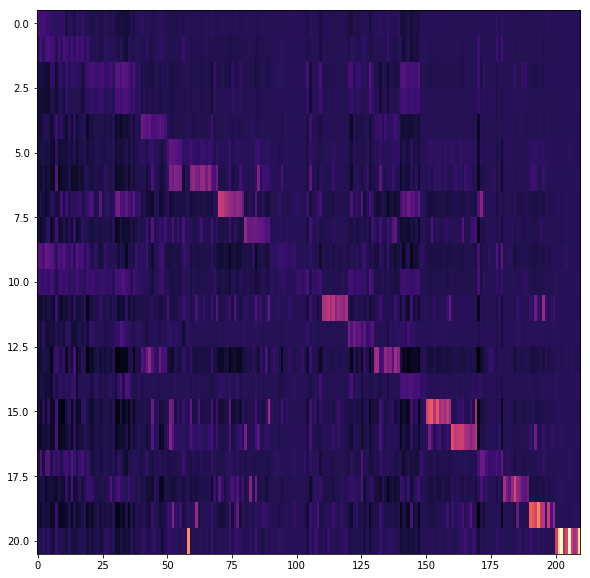

In [12]:
best_genes = np.array(regressed[np.array(top_genes).flatten()])

from functools import reduce
n_clusters = np.unique(clusters).shape[0]
dfs = [best_genes[clusters == i] for i in range(n_clusters)]
#df = reduce(lambda left, right: left.append(right), dfs)
df = np.vstack(dfs)

means = [np.mean(best_genes[clusters == i], axis=0) 
         for i in range(n_clusters)]
means = np.vstack(means)

plt.figure(figsize=(10, 10))
plt.imshow(means[:], aspect=means.shape[1]/means.shape[0],
           interpolation='none', cmap='magma')